In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

dataset = pd.read_csv('winequality-red.csv') #read the data
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [311]:
#normalization
dataset_n = (dataset - dataset.mean())/dataset.std()
dataset_n.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


In [312]:
#outlier
X_out = np.random.rand(100, 5) * 100
y_out = X_out.dot(np.array([1, 2, 3, 4, 5])) + np.random.randn(100) * 10

# calculate the Z-score for each data point
z_scores = np.abs((y_out - np.mean(y_out)) / np.std(y_out))

# set a threshold for the Z-score
threshold = 3
# identify the outliers
outliers = np.where(z_scores > threshold)

# remove the outliers from the data
X_clean = np.delete(X_out, outliers, axis=0)
y_clean = np.delete(y_out, outliers)

In [313]:
#setting the matrixes
X = dataset_n.iloc[:,0:11]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = dataset_n.iloc[:,11].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros(12)

#set hyper parameters
alpha = 0.1
epochs = 500

y

array([-0.78757625, -0.78757625, -0.78757625, ...,  0.45070735,
       -0.78757625,  0.45070735])

In [314]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, y, test_size = 0.3,random_state=19)
w=np.zeros(12)
Btrain=0

In [315]:
def CostFunction(x,y,w,b):
    return np.sum(np.power((x.dot(w)-y),2))/(2*len(y))

In [316]:
def gradient_descent(x,y,w,b,epochs,alpha):
    cost=np.zeros(epochs)
    cost_list = [0] * epochs
    for epoch in range(epochs):
        weight_gradient = x.T.dot(x.dot(w)+b-y)/len(y)
        bias_gradient =np.sum(x.dot(w)+b-y)/len(y)
        w=w-alpha*weight_gradient
        b=b-alpha*bias_gradient
        b = b - alpha * bias_gradient
        cost[epoch]=CostFunction(x,y,w,b)
        
    return w,b,cost

w,b, c= gradient_descent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]),Btrain,500, 0.1)
print(c)

finalCost = CostFunction(X,y,w,b)
print(finalCost)

[0.43292605 0.39978956 0.37690998 0.36095595 0.34972413 0.34173915
 0.33600329 0.33183639 0.32877153 0.32648631 0.32475681 0.32342669
 0.32238623 0.32155795 0.32088684 0.3203336  0.31986993 0.31947531
 0.31913473 0.31883711 0.31857417 0.31833969 0.31812888 0.31793808
 0.31776438 0.31760548 0.31745953 0.31732501 0.31720067 0.31708544
 0.31697843 0.31687886 0.31678607 0.31669947 0.31661854 0.31654283
 0.31647191 0.31640543 0.31634304 0.31628445 0.31622939 0.31617759
 0.31612884 0.31608292 0.31603964 0.31599882 0.3159603  0.31592394
 0.31588958 0.3158571  0.31582639 0.31579732 0.31576981 0.31574375
 0.31571906 0.31569565 0.31567344 0.31565237 0.31563237 0.31561338
 0.31559533 0.31557818 0.31556187 0.31554635 0.31553159 0.31551754
 0.31550416 0.31549141 0.31547927 0.31546769 0.31545665 0.31544611
 0.31543607 0.31542647 0.31541732 0.31540857 0.31540022 0.31539223
 0.3153846  0.3153773  0.31537032 0.31536365 0.31535726 0.31535115
 0.31534529 0.31533969 0.31533432 0.31532917 0.31532425 0.3153

Text(0.5, 1.0, 'Error vs. Training Epoch')

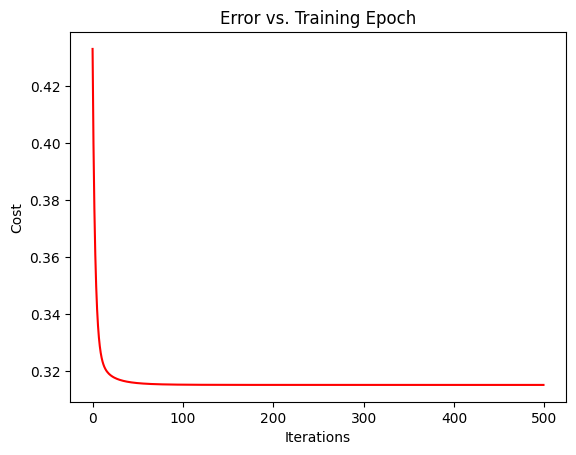

In [317]:
fig , ax = plt.subplots()  
ax.plot(np.arange(epochs), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

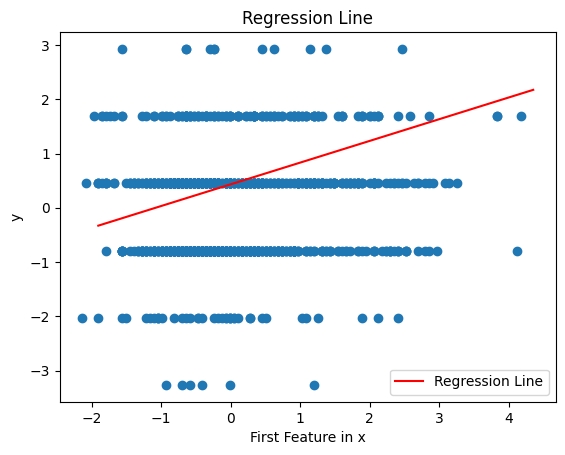

array([[ 1.        ,  0.2758967 ,  0.40310291, ...,  0.31665214,
        -0.99198772, -1.24145947],
       [ 1.        , -0.41332422,  1.4642015 , ..., -1.23788828,
        -1.28696083, -1.14762158],
       [ 1.        ,  1.59690346, -0.99307945, ..., -0.91402569,
        -0.75600924,  0.07227102],
       ...,
       [ 1.        , -1.33228544, -0.60214839, ...,  0.51096969,
         0.71885628, -0.39691844],
       [ 1.        ,  1.42459823, -0.32291192, ..., -0.91402569,
         0.60086704,  0.3537847 ],
       [ 1.        , -0.47075929,  0.9894995 , ..., -2.01515849,
         5.49742057, -0.8661079 ]])

In [318]:
x_values = np.linspace(np.min(Xtest[:,1]), np.max(Xtest[:,1]), 100)
y_values = c[0] + c[1]*x_values

plt.scatter(Xtrain[:,1],Ytrain)
plt.plot(x_values, y_values, color='r', label='Regression Line')
plt.xlabel('First Feature in x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

Xtest

In [319]:
def predict(X, w, b):
    return X.dot(w) + b

y_pred = predict(Xtest, w, b)

In [320]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

r2score(y_pred, Ytest)
print("Accuracy of the model is:",r2score(y_pred,Ytest)*100,"%")


Accuracy of the model is: 38.65298939237189 %
